# Least Action

Load modules

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import scipy.optimize 
global g  
g=9.8

Following:
http://www.eftaylor.com/software/ActionApplets/LeastAction.html, we define the Action in one small segment of the free fall movement in one-dimension. 
    
For one segment of the action between $(t_1,x_1)$, and $(t_2,x_2)$, with $\Delta t$ sifficiently small such that $L$ can be considered constant, we have
\begin{eqnarray}
S_1&=&\int_{t_1}^{t_2} L dt \\
&\approx& \left[\frac12 m v^2-m g h \right]\Delta t\\
&\approx& \left[\frac12 m\left(\frac{x_2-x_1}{t_2-t_1}\right)^2-m g \frac{x_2+x_1}{2} \right](t_2-t_1)
\end{eqnarray}
that corresponds to Eq. (11) of Am. J. Phys, Vol. 72(2004)478: http://www.eftaylor.com/pub/Symmetries&ConsLaws.pdf

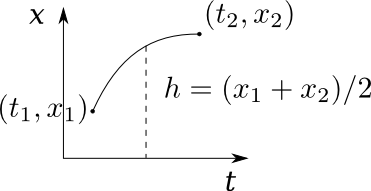

In [4]:
from IPython.display import Image
Image(filename='leastaction.png')

## Code implementation

We define the Action $S$ such of an object of mass $m$ throw vertically upward from $x_{\hbox{ini}}$, such that $t_{\hbox{end}}$ seconds later the object return to a height $x_{\hbox{end}}$, as
\begin{eqnarray}
S&=&\int_{t_{\hbox{ini}}}^{t_{\hbox{end}}} L dt \\
&=&\sum_i S_i \Delta t
\end{eqnarray}

In [5]:
def S(x,t=3.,m=0.2,xini=0.,xend=0.):
    t=float(t)
    Dt=t/x[:-1].size
    x=np.asarray(x)
    #Fix initial and final point
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-0.5*m*g*(x[1:]+x[:-1]))*Dt).sum()

Function to find the least Action by using `scipy.optimize.fmin_powell`. It start from $\mathbf{x}=(x_{\hbox{ini}},0,0,\ldots,x_{\hbox{end}})$ and find the least action

In [6]:
def xfit(n,t=3.,m=0.2,xini=0.,xend=0.,ftol=1E-8):
    '''Find the array of n (odd) components that minimizes the action S(x)

    :Parameters:

    n: odd integer 
        dimension of the ndarray x that minimizes the action  S(x,t,m)
    t,m: numbers
       optional parameters for the action
    ftol: number
        acceptable relative error in S(x) for convergence.

    :Returns: (x,xmax,Smin)
    
    x: ndarray
        minimizer of the action S(x)
        
    xini:
    
    xend:

    xmax: number
        Maximum height for the object

    Smin: number
        value of function at minimum: Smin = S(x)
    '''
    t=float(t)
    if n%2==0:
        print 'x array must be odd'
        sys.exit()
  
    x0=np.zeros(n)
    a=scipy.optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size
    return x,xmax,Smin,Dt  


## Least Action calculation

_Problem_: Let an object of mass $m=0.2$ Kg throw vertically updward and returning back to the same hand after 3 s. Find the function of distance versus time of least Action. 

Let us divide the intervals in 21 parts:

In [7]:
t=3.
m=0.2
y=xfit(21,t,m)
x=y[0]
Smin=y[2]
Dt=t/x[:-1].size
tx=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: -21.554977
         Iterations: 28
         Function evaluations: 5837


### Plot

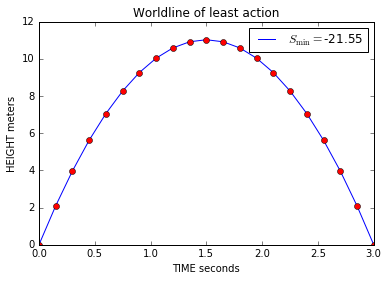

In [8]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(tx,x,'ro')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')

Any other trajectory in the configuration space must give a larger Action. It is illustrated by the following random trajectory choosen by a random brute force mimimization of the Action

In [14]:
srmin=1E20
for i in range(100000):
    xx=np.random.uniform(0,17,20)
    if S(xx)<srmin:
        srmin=S(xx)
        xrmin=xx

t=3.
Dt=t/xrmin[:-1].size
txx=np.arange(0,t+Dt,Dt)
print srmin

35.7781688127


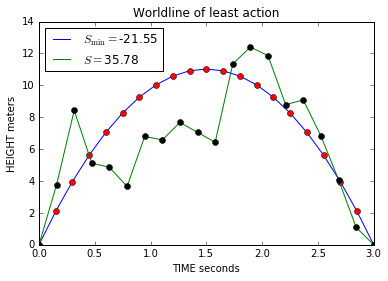

In [15]:
plt.plot(tx,x,label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(tx,x,'ro')
plt.plot(txx,xrmin,label='$S=$%.2f' %S(xrmin))
plt.plot(txx,xrmin,'ko')
plt.ylabel('HEIGHT meters')
plt.xlabel('TIME seconds')
plt.title('Worldline of least action')
plt.legend(loc='best')

### Dynamics of the least action solution

#### Velocity

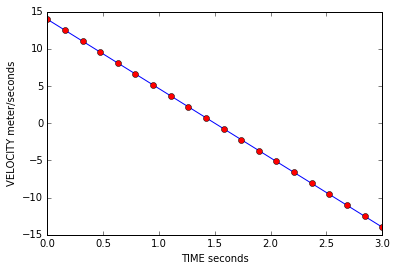

In [10]:
v=(x[1:]-x[:-1])/Dt
Dt=t/v[:-1].size
tx=np.arange(0,t+Dt,Dt)
plt.plot(tx,v)
plt.plot(tx,v,'ro')
plt.xlabel('TIME seconds')
plt.ylabel('VELOCITY meter/seconds')

#### Aceleration

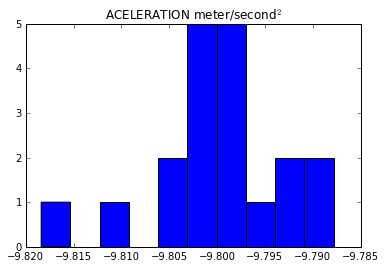

In [11]:
Dt=t/x[:-1].size
a=(v[1:]-v[:-1])/Dt
pa=plt.hist(a)
plt.title('ACELERATION meter/second$^2$')

#### Energy

In [12]:
T=0.5*m*v**2
V=0.5*m*g*(x[1:]+x[:-1])
E=T+V
print np.round(E,2)

[ 21.56  21.56  21.56  21.56  21.56  21.56  21.55  21.55  21.56  21.56
  21.56  21.56  21.56  21.56  21.56  21.55  21.55  21.56  21.56  21.55]


#### Action

The Action is minimal in each interval!

In [13]:
SS=(T-V)*Dt
SS

array([ 2.6176807 ,  1.45086655,  0.41339493, -0.49445999, -1.27239049,
       -1.92031545, -2.4394347 , -2.82826668, -3.08743238, -3.21713111,
       -3.21711685, -3.08747346, -2.82816485, -2.43888968, -1.9203943 ,
       -1.27224487, -0.49433121,  0.41338257,  1.45064061,  2.61710336])

In [14]:
print 'S_MINIMUM=%g  Joules*second' %SS.sum()

S_MINIMUM=-21.555  Joules*second
